In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Objective:
Analyze global CO₂ emissions over the years by country and sector to understand:

Which countries contribute most

Emissions trends over time

Insights into per capita emissions



In [4]:
df = pd.read_csv("E:\owid-co2-data.csv")

In [6]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [8]:
df.shape

(50191, 79)

In [10]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

In [14]:
df.describe

<bound method NDFrame.describe of            country  year iso_code  population           gdp  cement_co2  \
0      Afghanistan  1750      AFG   2802560.0           NaN       0.000   
1      Afghanistan  1751      AFG         NaN           NaN       0.000   
2      Afghanistan  1752      AFG         NaN           NaN       0.000   
3      Afghanistan  1753      AFG         NaN           NaN       0.000   
4      Afghanistan  1754      AFG         NaN           NaN       0.000   
...            ...   ...      ...         ...           ...         ...   
50186     Zimbabwe  2019      ZWE  15271377.0  2.514642e+10       0.473   
50187     Zimbabwe  2020      ZWE  15526888.0  2.317871e+10       0.496   
50188     Zimbabwe  2021      ZWE  15797220.0  2.514009e+10       0.531   
50189     Zimbabwe  2022      ZWE  16069061.0  2.590159e+10       0.531   
50190     Zimbabwe  2023      ZWE  16340829.0           NaN       0.531   

       cement_co2_per_capita     co2  co2_growth_abs  co2_growth_

In [16]:
# Drop Non-Country Entities. Remove rows for continents or world aggregates. remove all the rows with continent 
df = df[df["iso_code"].str.len()==3]

In [18]:
df.shape

(42262, 79)

In [20]:
#handling missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing>0]

share_global_other_co2                  40698
share_global_cumulative_other_co2       40698
other_industry_co2                      40571
other_co2_per_capita                    40571
cumulative_other_co2                    40571
                                        ...  
nitrous_oxide                            7288
share_of_temperature_change_from_ghg     5067
temperature_change_from_co2              5067
temperature_change_from_ghg              5067
population                               4046
Length: 76, dtype: int64

In [22]:
#filter for year 2020
df2020 = df[df["year"]==2020]
df2020.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
270,Afghanistan,2020,AFG,39068978.0,7.141771e+10,0.061,0.002,11.606,0.781,7.213,...,NaN,0.083,0.001,0.001,0.001,0.0,37.833,18.633,NaN,NaN
892,Albania,2020,ALB,2871951.0,3.213073e+10,1.322,0.460,4.711,-0.116,-2.399,...,NaN,0.025,0.000,0.000,0.000,0.0,8.120,5.787,1.058,22.453
1066,Algeria,2020,DZA,44042093.0,5.598199e+11,8.958,0.203,168.178,-11.729,-6.519,...,NaN,0.398,0.004,0.002,0.006,0.0,264.184,250.813,NaN,NaN
1340,Andorra,2020,AND,77398.0,NaN,0.000,0.000,0.381,-0.110,-22.388,...,NaN,0.001,0.000,0.000,0.000,0.0,0.499,0.423,NaN,NaN
1514,Angola,2020,AGO,33451140.0,1.523087e+11,1.054,0.032,16.533,-5.514,-25.011,...,NaN,0.350,0.003,0.003,0.006,0.0,175.331,56.389,NaN,NaN


## Top 10 Countries by Total CO₂ Emissions

In [24]:
#Top 10 Countries by Total CO₂ Emissions
top_emitters = df2020.sort_values(by='co2',ascending=False).head(10)

In [26]:
top_emitters

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
9882,China,2020,CHN,1.426106e+09,2.415184e+13,849.976,0.596,10905.693,191.709,1.789,...,58.136,12.246,0.059,0.127,0.195,0.009,12841.301,12420.610,-932.869,-8.554
47796,United States,2020,USA,3.394362e+08,1.802736e+13,40.688,0.120,4714.628,-547.517,-10.405,...,8.294,17.591,0.035,0.235,0.280,0.011,5651.509,5262.847,472.234,10.016
21655,India,2020,IND,1.402618e+09,8.945314e+12,122.908,0.088,2421.552,-191.336,-7.323,...,NaN,4.650,0.033,0.034,0.074,0.006,3515.709,2822.871,-173.735,-7.175
38154,Russia,2020,RUS,1.463713e+08,3.606717e+12,20.581,0.141,1632.929,-72.102,-4.229,...,5.536,6.864,0.020,0.086,0.109,0.004,2403.698,2117.645,-266.136,-16.298
23729,Japan,2020,JPN,1.263045e+08,4.626661e+12,24.490,0.194,1040.483,-64.995,-5.879,...,2.388,2.122,0.002,0.031,0.034,0.001,1082.978,1068.269,145.326,13.967
22585,Iran,2020,IRN,8.772345e+07,1.446204e+12,38.808,0.442,756.606,21.259,2.891,...,NaN,1.115,0.008,0.009,0.018,0.001,989.057,948.608,-66.497,-8.789
18227,Germany,2020,DEU,8.362871e+07,3.742721e+12,13.357,0.160,648.357,-61.470,-8.660,...,2.725,2.969,0.004,0.041,0.047,0.002,729.728,691.065,122.566,18.904
40117,Saudi Arabia,2020,SAU,3.099120e+07,1.613933e+12,25.593,0.826,616.086,-41.502,-6.311,...,NaN,0.753,0.005,0.007,0.012,0.000,752.066,744.983,6.191,1.005
21829,Indonesia,2020,IDN,2.748149e+08,3.204973e+12,26.297,0.096,608.223,-45.568,-6.970,...,NaN,3.410,0.014,0.039,0.054,0.001,1682.395,923.432,15.485,2.546
42852,South Korea,2020,KOR,5.185848e+07,2.001232e+12,22.866,0.441,597.634,-48.468,-7.502,...,3.451,0.620,0.002,0.008,0.010,0.000,642.407,639.013,60.540,10.130


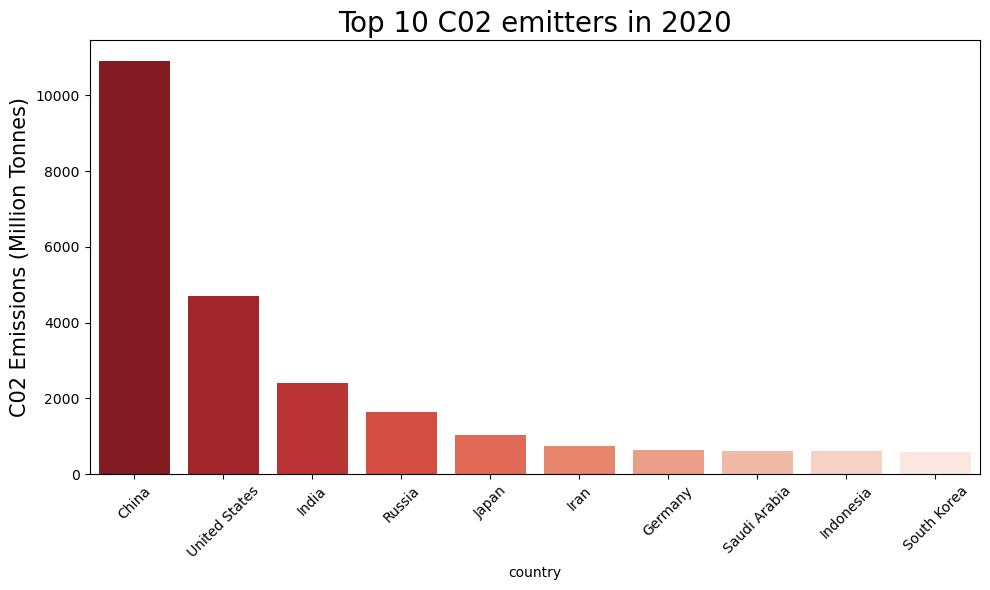

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_emitters, x='country', y='co2',palette='Reds_r')
plt.title('Top 10 C02 emitters in 2020',fontsize=20)
plt.ylabel("C02 Emissions (Million Tonnes)",fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Trend Analysis – CO₂ Emissions Over Time

In [39]:
#For selected countries (e.g., US, China, India).
countries = ['United States','China','India']

In [61]:
trend_data = df[df['country'].isin(countries)  & (df['year'] >= 1990)]

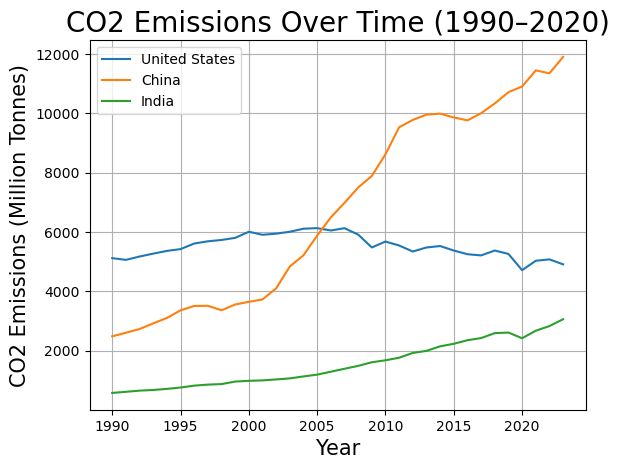

In [63]:
for country in countries:
    country_data = trend_data[trend_data['country']==country]
    plt.plot(country_data['year'], country_data['co2'], label=country)
plt.title("CO2 Emissions Over Time (1990–2020)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("CO2 Emissions (Million Tonnes)",fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

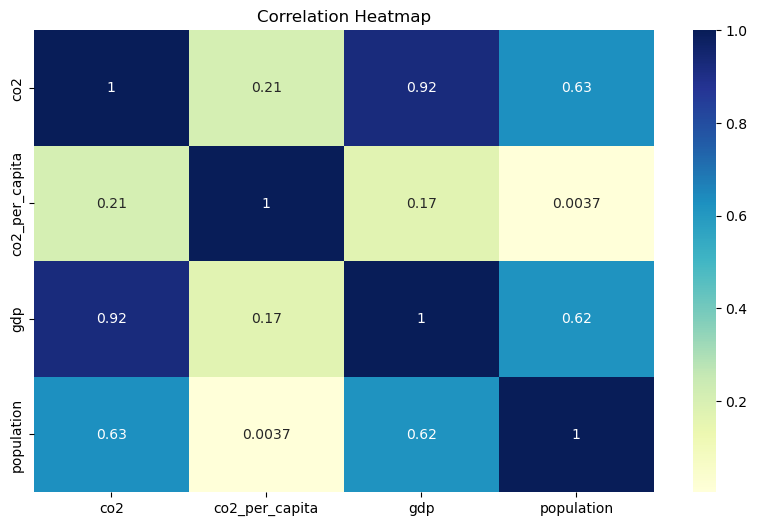

In [69]:
#Correlation Heatmap
#Focus on numeric columns to check how features relate.
plt.figure(figsize=(10,6))
numeric_cols = ['co2', 'co2_per_capita', 'gdp', 'population']
heatmap_data = df[numeric_cols].dropna()
sns.heatmap(heatmap_data.corr(),annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

## Distribution of CO₂ per Capita


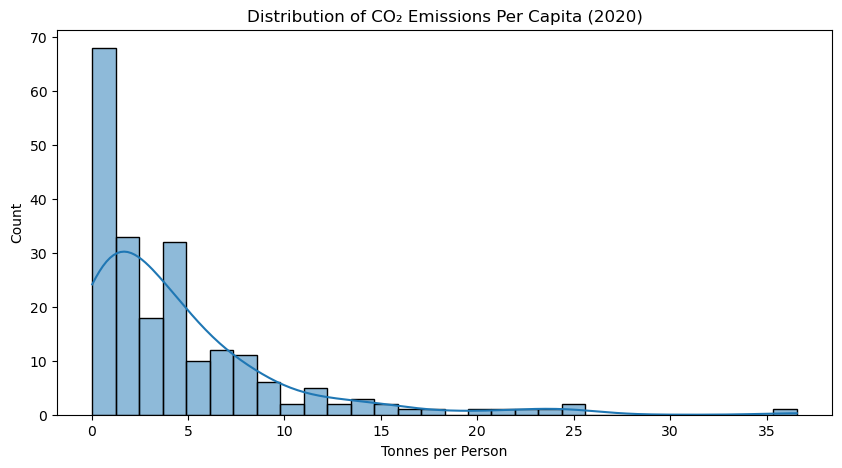

In [76]:
plt.figure(figsize=(10,5))
sns.histplot(df2020['co2_per_capita'].dropna(),kde=True,bins=30)
plt.title("Distribution of CO₂ Emissions Per Capita (2020)")
plt.xlabel("Tonnes per Person")
plt.show()

##  Relationship Between Population and CO₂

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


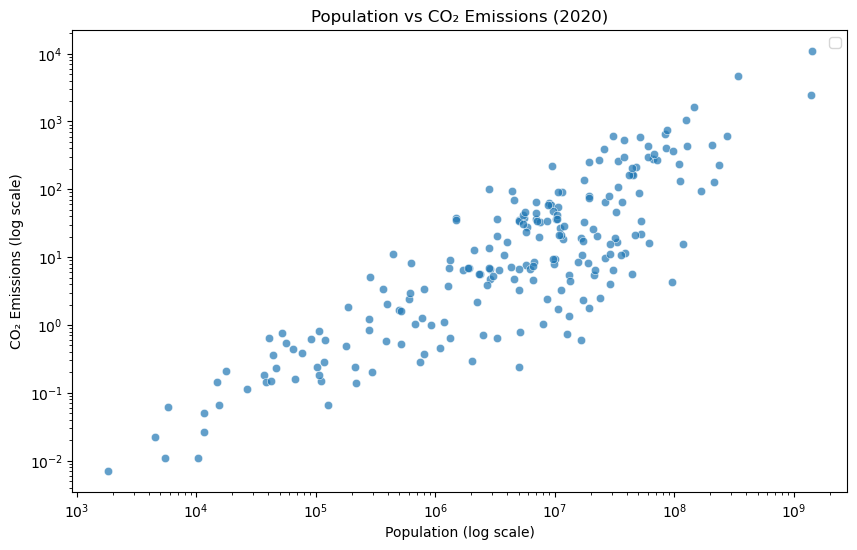

In [87]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2020, x='population', y='co2',alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title("Population vs CO₂ Emissions (2020)")
plt.xlabel("Population (log scale)")
plt.ylabel("CO₂ Emissions (log scale)")
plt.legend()
plt.show()

# Summary of EDA Insights:
Top emitters by volume are China, USA, India.

Per capita emitters are often oil-rich small countries.

CO₂ emissions have increased for China and India, but stabilized or decreased in USA.

Emissions are positively correlated with GDP and population.

